In [ ]:
# https://github.com/awslabs/amazon-sagemaker-examples/blob/master/advanced_functionality/working_with_redshift_data/working_with_redshift_data.ipynb

In [58]:
import os
import boto3
import pandas as pd
import json
import psycopg2
import sqlalchemy as sa
import json

In [59]:
credfile = 'redshift_creds_template.json.nogit'

# Read credentials to a dictionary
with open(credfile) as fh:
    creds = json.loads(fh.read())

def get_conn(creds): 
    conn = psycopg2.connect(dbname=creds['db_name'], 
                            user=creds['username'], 
                            password=creds['password'],
                            port=creds['port_num'],
                            host=creds['host_name'])
    return conn

def get_df(creds, query):
    with get_conn(creds) as conn:
        with conn.cursor() as cur:
            cur.execute(query)
            result_set = cur.fetchall()
            colnames = [desc.name for desc in cur.description]
            df = pd.DataFrame.from_records(result_set, columns=colnames)
    return df

In [ ]:
sql = "select table_name from information_schema.tables where table_name like 'awsbilling%'"
table_df = get_df(creds, sql)
table_df

In [60]:
import os
import boto3
region = os.getenv('AWS_DEFAULT_REGION')
s3 = boto3.client('s3', region_name=region)

s3_bucket = 'sungardas-aws-services-billing-graphimagebucket-lv7d7riqedp7'
prefix = 'dataframes/'

In [61]:
# import all dataframes from s3 bucket

import pickle

all_df = pd.DataFrame()

response = s3.list_objects(Bucket=s3_bucket, Prefix=prefix)
for obj in response['Contents']:
    month_response = s3.get_object(Bucket=s3_bucket, Key=obj['Key'])
    month_df = pickle.loads(month_response['Body'].read())
    print("{} dataframe has been imported".format(obj['Key']))
    #print(month_df.head())
    all_df = pd.concat([all_df, month_df], ignore_index=True)

print("all dataframes have been imported")
all_df

dataframes/201608_by_day.pkl dataframe has been imported
dataframes/201609_by_day.pkl dataframe has been imported
dataframes/201610_by_day.pkl dataframe has been imported
dataframes/201611_by_day.pkl dataframe has been imported
dataframes/201612_by_day.pkl dataframe has been imported
dataframes/201701_by_day.pkl dataframe has been imported
dataframes/201702_by_day.pkl dataframe has been imported
dataframes/201703_by_day.pkl dataframe has been imported
dataframes/201704_by_day.pkl dataframe has been imported
dataframes/201705_by_day.pkl dataframe has been imported
dataframes/201706_by_day.pkl dataframe has been imported
dataframes/201707_by_day.pkl dataframe has been imported
dataframes/201708_by_day.pkl dataframe has been imported
dataframes/201709_by_day.pkl dataframe has been imported
dataframes/201710_by_day.pkl dataframe has been imported
dataframes/201711_by_day.pkl dataframe has been imported
dataframes/201712_by_day.pkl dataframe has been imported
dataframes/201801_by_day.pkl da

,enddatetime,lineitem_usageaccountid,lineitem_productcode,usage_amount,blended,unblended
0,2016-08-01,041802784822,AWSCloudTrail,1086,0.00,0.00
1,2016-08-01,041802784822,AWSConfig,49,0.15,0.15
2,2016-08-01,041802784822,AWSQueueService,2597,0.00,0.00
3,2016-08-01,041802784822,AmazonDynamoDB,10,0.00,0.00
4,2016-08-01,041802784822,AmazonEC2,75327,1.20,1.20
5,2016-08-01,041802784822,AmazonS3,331,0.00,0.00
6,2016-08-01,041802784822,AmazonSNS,59,0.00,0.00
7,2016-08-01,050132637519,AWSCloudTrail,451092,0.00,0.00
8,2016-08-01,050132637519,AWSConfig,32,0.10,0.10
9,2016-08-01,050132637519,AWSLambda,1425,0.00,0.00


In [62]:
# find the current month data

import datetime
from dateutil.relativedelta import relativedelta
from dateutil import parser

current_date = datetime.datetime.today()

sql = "select substring(cast(lineitem_usageenddate as datetime) from 1 for 10) enddatetime, lineItem_UsageAccountId, lineitem_productcode,"
sql += " sum(lineItem_UsageAmount) usage_amount,"
sql += " to_char(sum(cast(lineItem_BlendedCost as float)), 'FM999,999,999,990D00') blended,"
sql += " to_char(sum(cast(lineitem_unblendedcost as float)), 'FM999,999,999,990D00') unblended"
sql += " from AWSBilling%s" % (current_date.strftime('%Y%m'))
sql += " where lineitem_lineitemtype != 'Tax'"
sql += " and lineitem_usageenddate >= '%s'" % (current_date.strftime('%Y-%m-01'))
sql += " and lineitem_usageenddate < '%s'" % (current_date.strftime('%Y-%m-%d'))
sql += " group by enddatetime, lineItem_UsageAccountId, lineitem_productcode"
sql += " order by enddatetime, lineItem_UsageAccountId, lineitem_productcode"
print(sql)
current_df = get_df(creds, sql)
current_df

select substring(cast(lineitem_usageenddate as datetime) from 1 for 10) enddatetime, lineItem_UsageAccountId, lineitem_productcode, sum(lineItem_UsageAmount) usage_amount, to_char(sum(cast(lineItem_BlendedCost as float)), 'FM999,999,999,990D00') blended, to_char(sum(cast(lineitem_unblendedcost as float)), 'FM999,999,999,990D00') unblended from AWSBilling201802 where lineitem_lineitemtype != 'Tax' and lineitem_usageenddate >= '2018-02-01' and lineitem_usageenddate < '2018-02-14' group by enddatetime, lineItem_UsageAccountId, lineitem_productcode order by enddatetime, lineItem_UsageAccountId, lineitem_productcode


,enddatetime,lineitem_usageaccountid,lineitem_productcode,usage_amount,blended,unblended
0,2018-02-01,014458831776,AWSCloudTrail,6737,0.00,0.00
1,2018-02-01,014458831776,AmazonS3,5429,0.01,0.01
2,2018-02-01,015468674240,AWSCloudTrail,6406,0.00,0.00
3,2018-02-01,015468674240,AmazonEC2,23,0.11,0.11
4,2018-02-01,015468674240,AmazonS3,5130,0.01,0.01
5,2018-02-01,018259383398,AWSCloudTrail,6129,0.00,0.00
6,2018-02-01,018259383398,AmazonS3,4951,0.01,0.01
7,2018-02-01,023013128792,AWSCloudTrail,6494,0.00,0.00
8,2018-02-01,023013128792,AmazonS3,5107,0.01,0.01
9,2018-02-01,027391513213,AWSCloudTrail,3789,0.00,0.00


In [63]:
# merge the current data into all
all_df = pd.concat([all_df, current_df], ignore_index=True)
all_df

,enddatetime,lineitem_usageaccountid,lineitem_productcode,usage_amount,blended,unblended
0,2016-08-01,041802784822,AWSCloudTrail,1086,0.00,0.00
1,2016-08-01,041802784822,AWSConfig,49,0.15,0.15
2,2016-08-01,041802784822,AWSQueueService,2597,0.00,0.00
3,2016-08-01,041802784822,AmazonDynamoDB,10,0.00,0.00
4,2016-08-01,041802784822,AmazonEC2,75327,1.20,1.20
5,2016-08-01,041802784822,AmazonS3,331,0.00,0.00
6,2016-08-01,041802784822,AmazonSNS,59,0.00,0.00
7,2016-08-01,050132637519,AWSCloudTrail,451092,0.00,0.00
8,2016-08-01,050132637519,AWSConfig,32,0.10,0.10
9,2016-08-01,050132637519,AWSLambda,1425,0.00,0.00


In [64]:
valid_df = all_df[(all_df['blended'] >= '1.00') | (all_df['unblended'] >= '1.00')]
valid_df

,enddatetime,lineitem_usageaccountid,lineitem_productcode,usage_amount,blended,unblended
4,2016-08-01,041802784822,AmazonEC2,75327,1.20,1.20
12,2016-08-01,050132637519,AmazonEC2,81121,33.58,33.57
14,2016-08-01,050132637519,AmazonES,23,2.16,2.16
15,2016-08-01,050132637519,AmazonRDS,3122653,53.99,53.99
23,2016-08-01,054649790173,AmazonEC2,7118222,8.26,8.24
26,2016-08-01,054649790173,AmazonRoute53,29328,2.08,3.01
30,2016-08-01,054649790173,AmazonVPC,23,1.15,1.15
35,2016-08-01,059504812767,AmazonEC2,56127,42.33,42.32
36,2016-08-01,059504812767,AmazonRDS,23,19.25,19.25
40,2016-08-01,059504812767,AmazonVPC,23,1.15,1.15


In [ ]:
services = valid_df.lineitem_productcode.unique()
print(services)
print(len(services))

In [ ]:
accounts = valid_df.lineitem_usageaccountid.unique()
len(accounts)

In [ ]:
target_df = valid_df[(valid_df['lineitem_productcode'] == 'AmazonEC2')
                      & (valid_df['lineitem_usageaccountid'] == '876224653878')
                      & (valid_df['enddatetime'] >= '2018-02-01')
                      & (valid_df['enddatetime'] < '2018-03-01')
                     ]
target_df

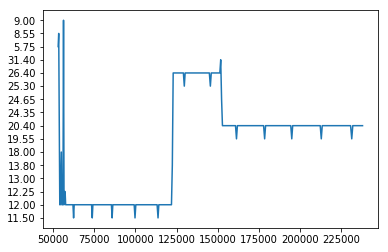

In [65]:
import matplotlib.pyplot as plt

service = 'AmazonRedshift'
account = '054649790173'

svc_df = valid_df[(valid_df['lineitem_productcode'] == service)
                  & (valid_df['lineitem_usageaccountid'] == account)
                  & (valid_df['enddatetime'] >= '2017-010-01')
                 ]
#print(svc_df['unblended'].head())
plt.plot(svc_df['unblended'])
plt.show()

In [ ]:
import matplotlib
matplotlib.__version__

In [ ]:
#################################################################################################################
# https://machinelearningmastery.com/time-series-forecasting-long-short-term-memory-network-python/

In [66]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from pandas import concat

# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
    df = DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    df = concat(columns, axis=1)
    df.fillna(0, inplace=True)
    return df

In [67]:
from pandas import Series
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
import numpy
from sklearn.metrics import mean_squared_error

In [ ]:
###############################################
# 1. normalize data
# 2. transform normalized data to be supervised learning
# 3. split normalized data into train and test sets
###############################################

series = svc_df['unblended']
print("series:")
print(series.head())
print(len(series))

# transform scale
X = series.values
X = X.reshape(len(X), 1)
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler = scaler.fit(X)
scaled_X = scaler.transform(X)
scaled_series = Series(scaled_X[:, 0])
print("\nscaled_series:")
print(scaled_series.head())

# invert transform
inverted_X = scaler.inverse_transform(scaled_X)
inverted_series = Series(inverted_X[:, 0])
print("\ninverted_series:")
print(inverted_series.head())

# transform normalized data to supervised learning
X = scaled_series.values
supervised = timeseries_to_supervised(X, 1)
print("\nsupervised:")
print(supervised)

# split data into train and test-sets
supervised_values = supervised.values
train_size = int(len(supervised_values) * 0.67)
test_size = len(supervised_values) - train_size
train, test = supervised_values[0:train_size,:], supervised_values[train_size:len(dataset),:]
print("\ntrain:")
print(train)
print("\ntest:")
print(test)
print(len(train), len(test))

In [68]:
###############################################
# 1. transform data to be supervised learning
# 2. split data into train and test sets
# 3. normalize both sets
###############################################

# scale train and test data to [-1, 1]
def scale(train, test):
    # fit scaler
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(train)
    # transform train
    train = train.reshape(train.shape[0], train.shape[1])
    train_scaled = scaler.transform(train)
    # transform test
    test = test.reshape(test.shape[0], test.shape[1])
    test_scaled = scaler.transform(test)
    return scaler, train_scaled, test_scaled
 
# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
    new_row = [x for x in X] + [value]
    array = numpy.array(new_row)
    array = array.reshape(1, len(array))
    inverted = scaler.inverse_transform(array)
    return inverted[0, -1]

series = svc_df['unblended']
print("series:")
print(series.head())
print(len(series))

raw_values = series.values
raw_values = raw_values.astype('float32')
print("\nnumbers of raw_values:")
print(len(raw_values))

# transform data to be supervised learning
supervised = timeseries_to_supervised(series, 1)
supervised_values = supervised.values
print("\nsupervised_values:")
print(supervised_values)

# split data into train and test-sets
supervised_values = supervised.values
train_size = int(len(supervised_values) * 0.67)
test_size = len(supervised_values) - train_size
train, test = supervised_values[0:train_size,:], supervised_values[train_size:len(supervised_values),:]
print("\ntrain:")
print(train)
print("\ntest:")
print(test)
print(len(train), len(test))

# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)
print("\ntrain_scaled:")
print(train_scaled)
print("\ntest_scaled:")
print(test_scaled)

series:
53150     5.75
53483     8.55
53805    24.35
54129    12.00
54432    12.00
Name: unblended, dtype: object
378

numbers of raw_values:
378

supervised_values:
[[0 '5.75']
 ['5.75' '8.55']
 ['8.55' '24.35']
 ['24.35' '12.00']
 ['12.00' '12.00']
 ['12.00' '13.00']
 ['13.00' '18.00']
 ['18.00' '12.00']
 ['12.00' '12.00']
 ['12.00' '12.00']
 ['12.00' '9.00']
 ['9.00' '12.00']
 ['12.00' '12.25']
 ['12.25' '12.25']
 ['12.25' '12.00']
 ['12.00' '12.00']
 ['12.00' '12.00']
 ['12.00' '12.00']
 ['12.00' '12.00']
 ['12.00' '12.00']
 ['12.00' '12.00']
 ['12.00' '12.00']
 ['12.00' '12.00']
 ['12.00' '12.00']
 ['12.00' '12.00']
 ['12.00' '12.00']
 ['12.00' '12.00']
 ['12.00' '12.00']
 ['12.00' '11.50']
 ['11.50' '12.00']
 ['12.00' '12.00']
 ['12.00' '12.00']
 ['12.00' '12.00']
 ['12.00' '12.00']
 ['12.00' '12.00']
 ['12.00' '12.00']
 ['12.00' '12.00']
 ['12.00' '12.00']
 ['12.00' '12.00']
 ['12.00' '12.00']
 ['12.00' '12.00']
 ['12.00' '12.00']
 ['12.00' '12.00']
 ['12.00' '12.00']
 ['12.00' 

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [69]:
# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
    X, y = train[:, 0:-1], train[:, -1]
    
    # Given that the training dataset is defined as X inputs and y outputs,
    # it must be reshaped into the Samples/TimeSteps/Features format
    X = X.reshape(X.shape[0], 1, X.shape[1])
    
    model = Sequential()
    model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    for i in range(nb_epoch):
        if i % 100 == 0:
            print("epoch %d" % i)
        model.fit(X, y, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
        model.reset_states()
    return model

# fit the model
lstm_model = fit_lstm(train_scaled, 1, 1000, 4)

epoch 0
epoch 100
epoch 200
epoch 300
epoch 400
epoch 500
epoch 600
epoch 700
epoch 800
epoch 900


In [70]:
# forecast the entire training dataset to build up state for forecasting
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
lstm_model.predict(train_reshaped, batch_size=1)

array([[-0.91593266],
       [-0.40420529],
       [-0.18003115],
       [-0.01152009],
       [-0.60675406],
       [-0.33529034],
       [-0.48833135],
       [ 0.13718128],
       [-0.7256155 ],
       [-0.29584849],
       [-0.62120187],
       [-0.64317894],
       [-0.41258064],
       [-0.49470344],
       [-0.43712065],
       [-0.49461302],
       [-0.46578988],
       [-0.48609152],
       [-0.47458103],
       [-0.48269728],
       [-0.4783642 ],
       [-0.48169079],
       [-0.48004684],
       [-0.48145321],
       [-0.48083624],
       [-0.48144767],
       [-0.48122409],
       [-0.48149744],
       [-0.48142233],
       [-0.51305306],
       [-0.46297458],
       [-0.48983499],
       [-0.47182283],
       [-0.48443708],
       [-0.4774144 ],
       [-0.48251626],
       [-0.47978577],
       [-0.48189768],
       [-0.48082355],
       [-0.48171207],
       [-0.48128828],
       [-0.48166594],
       [-0.48149875],
       [-0.4816598 ],
       [-0.48159376],
       [-0

In [71]:
# make a one-step forecast
def forecast_lstm(model, batch_size, X):
    X = X.reshape(1, 1, len(X))
    yhat = model.predict(X, batch_size=batch_size)
    return yhat[0,0]

# walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
    # make one-step forecast
    X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
    yhat = forecast_lstm(lstm_model, 1, X)
    # invert scaling
    yhat = invert_scale(scaler, X, yhat)
    # store forecast
    predictions.append(yhat)
    #expected = raw_values[len(train) + i + 1]
    expected = raw_values[len(train) + i]
    print('Day=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))

Day=1, Predicted=19.680047, Expected=20.400000
Day=2, Predicted=21.553938, Expected=20.400000
Day=3, Predicted=19.679996, Expected=20.400000
Day=4, Predicted=21.554026, Expected=20.400000
Day=5, Predicted=19.679969, Expected=20.400000
Day=6, Predicted=21.554053, Expected=20.400000
Day=7, Predicted=19.679962, Expected=20.400000
Day=8, Predicted=21.554057, Expected=20.400000
Day=9, Predicted=19.679962, Expected=20.400000
Day=10, Predicted=21.554057, Expected=20.400000
Day=11, Predicted=19.679962, Expected=20.400000
Day=12, Predicted=21.554057, Expected=20.400000
Day=13, Predicted=19.679962, Expected=20.400000
Day=14, Predicted=21.554057, Expected=20.400000
Day=15, Predicted=19.679962, Expected=20.400000
Day=16, Predicted=21.554057, Expected=20.400000
Day=17, Predicted=19.679962, Expected=20.400000
Day=18, Predicted=21.554057, Expected=20.400000
Day=19, Predicted=19.679962, Expected=20.400000
Day=20, Predicted=21.554057, Expected=20.400000
Day=21, Predicted=19.679962, Expected=19.549999
D

Test RMSE: 0.956


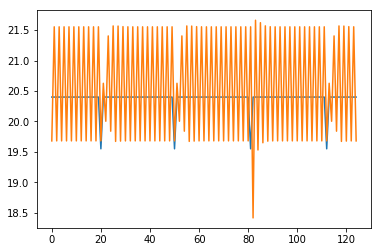

In [73]:
# report performance
rmse = sqrt(mean_squared_error(raw_values[len(train):], predictions))
print('Test RMSE: %.3f' % rmse)

# line plot of observed vs predicted
pyplot.plot(raw_values[len(train):])
pyplot.plot(predictions)
pyplot.show()